In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


#### rename columns

In [3]:
#lower case
cols = []
for column in data.columns:
    cols.append(column.lower())    
data.columns = cols
data.head(1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


In [4]:
#underscores
n_cols = []
for i in range(len(data.columns)):
    n_cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = n_cols
pd.set_option('display.max_columns', None)
data.head(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize


#### date column to datetime format

In [5]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])
data.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [6]:
data.dtypes #efective to date is now datetime64

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

#### differentiate between continious and discrete variables

the follwing commented lines of code I have done previously, but now I use a function that is more appropiate

In [7]:
#numerical=data.select_dtypes(include=['float64','int64']) # get the numerical data
#numerical.head(1)

In [8]:
#in this case we can say float is continious and int64 discrete
#continious_data=data.select_dtypes(include=['float64'])
#display(continious_data.head(1))
#discrete_data=data.select_dtypes(include=['int64'])
#display(discrete_data.head(1))

In [9]:
# we see that income is assigned as a discrete value because its int, clearly its a continious, so i change it to float
#data['income'] = data['income'].astype('float64')
#discrete_data=discrete_data.drop(['income'],axis=1)# drop income from discerete
#continious_data=data.select_dtypes(include=['float64'])
#display(continious_data.head(1))

In [10]:
def distinct_continioius(data):
    discrete_data=[]
    continious_data=[]
    for col in data.columns:
        if len(data[col].unique()) < (data.shape[0] *0.01): #if unqiue values in a column more than one percent of dataframe shape
            discrete_data.append(col)
        else:
            continious_data.append(col)
    return (discrete_data,continious_data)

In [11]:
#apply function
numerical=data.select_dtypes(include=['float64','int64'])
discrete_data, continious_data= distinct_continioius(numerical)

In [12]:
print(discrete_data)
print(continious_data)

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']


In [13]:
#create dataframe from list
discrete_data=numerical[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
continious_data=numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']]

### correlation matrix of numerical data

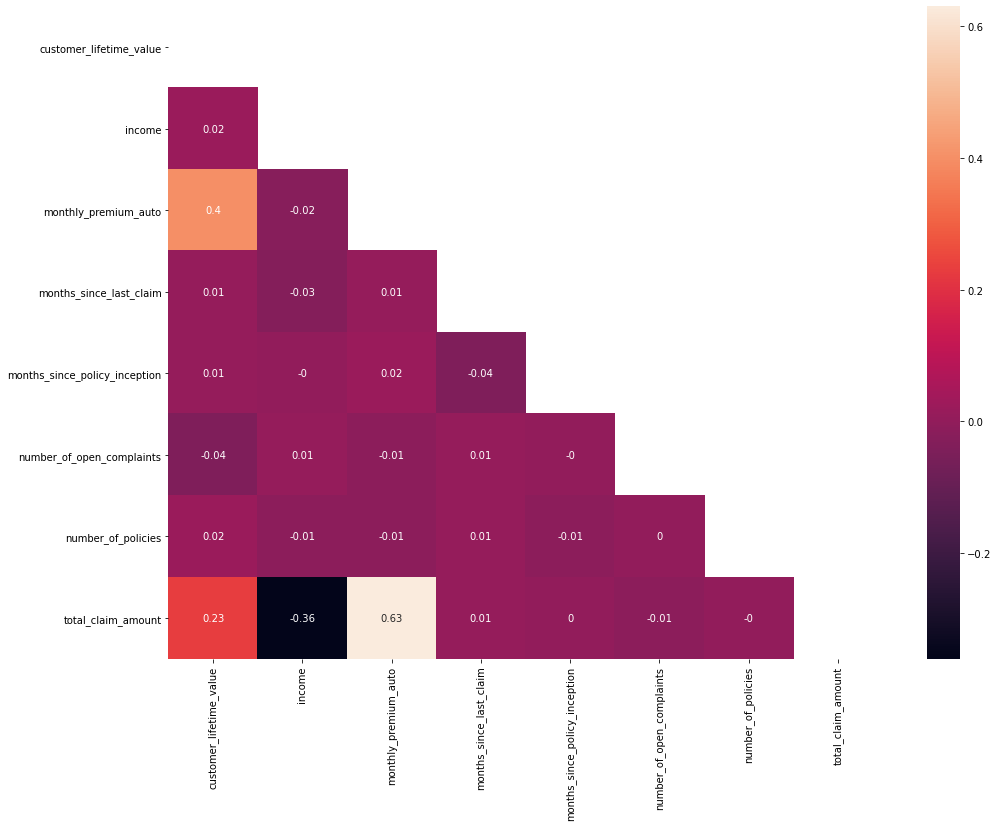

In [14]:
corr = np.corrcoef(numerical.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(numerical.corr().round(2), mask=mask, annot = True)

 we can say that our target value (total claimamount) is highly corrleated to montly_preimum_auto,
    monthly premium auto is also correlated to customer lifetime value,
    while the other vlaues are postively correlated the income is negatively correlated with total claim amount

#### plot every discrete variable

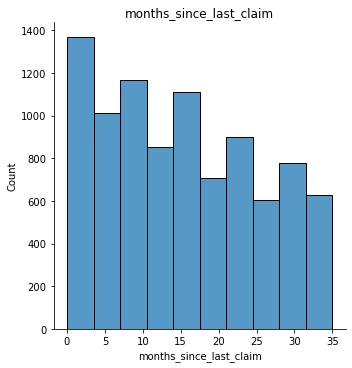

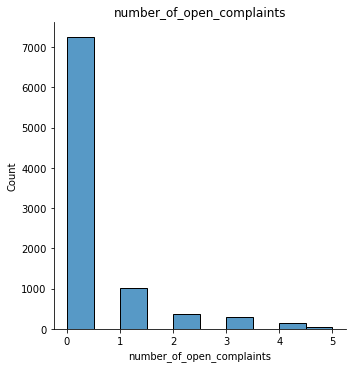

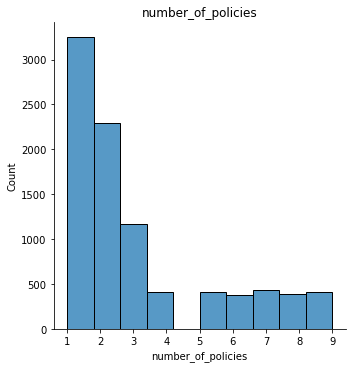

In [15]:
#use histogram for discrete data


for i in discrete_data.columns:
    sns.displot(x=i, data= discrete_data, bins=10)
    plt.title(i)
    plt.show()



some variables are more equally distrbruted than others, like mohtly preimium auto has a lot of low values but not somuch larger ones

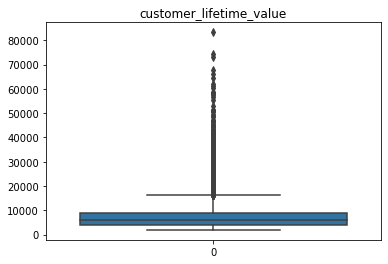

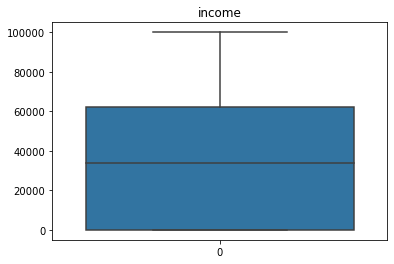

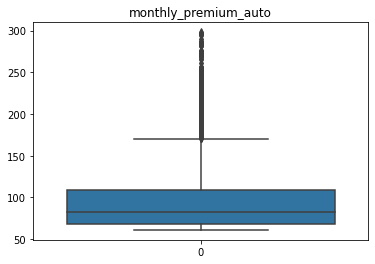

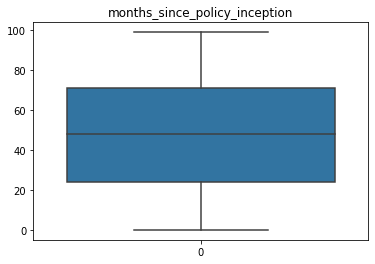

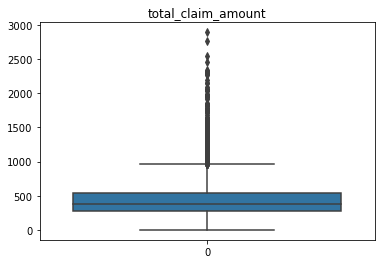

In [16]:
#use boxplotchart for others
for i in continious_data.columns:
    plt.figure()
    sns.boxplot(data=continious_data[i])
    plt.title(i)
    plt.show()

customer life time value & total claim amount have a lot of outliers we need to probaly take care of later, income is spread a lot

the outliers could be romves setting a resonable threshold

### check all columns for NaNs

In [17]:
data.isnull().sum()/len(data) #No Nans included

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# lab2: categorical data cleaning

In [18]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

<ipython-input-18-40bc8cf6ac51>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


#### already checked  Nans, no included

In [19]:
categoricals.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

#### check unqiue values if we can summarize or rearrange something

In [20]:
data.state.value_counts(dropna=False)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [21]:
data.response.value_counts(dropna=False) #one could transfer that to a boolean

No     7826
Yes    1308
Name: response, dtype: int64

In [22]:
data['response']=data.response.map(dict(Yes=1, No=0))

In [23]:
data['response'].dtype


dtype('int64')

In [24]:
data.coverage.value_counts(dropna=False)

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [25]:
data.education.value_counts(dropna=False)

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [26]:
data['education'] = np.where(data['education'].isin(['Bachelor','Master','Doctor']) , 'University', data['education'])

In [27]:
#we could summariaze this shigh school or below, college, and than univerity degree

In [28]:
data.education.value_counts(dropna=False)

University              3831
College                 2681
High School or Below    2622
Name: education, dtype: int64

In [29]:
data.employmentstatus.value_counts(dropna=False)

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [30]:
#we can summarize this since this could be evry important for a insurance company what the employment status is for this

In [31]:
data.gender.value_counts(dropna=False)

F    4658
M    4476
Name: gender, dtype: int64

In [32]:
data.location_code.value_counts(dropna=False)

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [33]:
data.marital_status.value_counts(dropna=False)

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [34]:
data.policy_type.value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [35]:
data.policy.value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

### policy type is also included in policy, therefore i keep policy type columbn and erase it from the policy column, policy becomes numerical

In [36]:
data['policy'] = data['policy'].str.replace(r'\D+', '', regex=True).astype('int')

In [37]:
data.policy.value_counts(dropna=False)

3    4588
2    2881
1    1665
Name: policy, dtype: int64

In [38]:
data.renew_offer_type.value_counts(dropna=False) #instead of string and number this could be also numerical

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [39]:
def offer(x):
    if x=='Offer1':
        return 1
    if x=='Offer2':
        return 2
    if x=='Offer3':
        return 3
    else:
        return 4

data['renew_offer_type'] = data['renew_offer_type'].apply(offer)

In [40]:
data.renew_offer_type.value_counts(dropna=False)

1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

In [41]:
data.renew_offer_type.dtypes

dtype('int64')

In [42]:
data.sales_channel.value_counts(dropna=False)

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [43]:
data.vehicle_class.value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [44]:
#one can group sports car,luxury SUV and luxury car into one group of luxury because all of them are expensive and not to high in values counts

In [45]:
data['vehicle_class'] = np.where(data['vehicle_class'].isin(['Sports Car','Luxury SUV','Luxury Car']) , 'Luxury', data['vehicle_class'])

In [46]:
data.vehicle_class.value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Luxury            831
Name: vehicle_class, dtype: int64

In [47]:
# one could think a SUV is normally also a four-door car, and a sports car potentially a two door car: but thats a lots of guessing and i wouldnt group it since its just 6 categories

In [48]:
data.vehicle_size.value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [49]:
#we dont have any categoricals that have a lot of unique values

In [50]:
categoricals = data.select_dtypes(np.object)
categoricals=categoricals.drop(['customer'], axis=1)
categoricals.head(20)

<ipython-input-50-a8490e2f2ebb>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,sales_channel,vehicle_class,vehicle_size
0,Washington,Basic,University,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,Medsize
1,Arizona,Extended,University,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car,Medsize
2,Nevada,Premium,University,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,Medsize
3,California,Basic,University,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV,Medsize
4,Washington,Basic,University,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car,Medsize
5,Oregon,Basic,University,Employed,F,Rural,Married,Personal Auto,Web,Two-Door Car,Medsize
6,Oregon,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Agent,Four-Door Car,Medsize
7,Arizona,Premium,University,Unemployed,M,Urban,Single,Corporate Auto,Agent,Four-Door Car,Medsize
8,Oregon,Basic,University,Medical Leave,M,Suburban,Divorced,Corporate Auto,Agent,Four-Door Car,Medsize
9,Oregon,Extended,College,Employed,F,Urban,Married,Special Auto,Branch,Four-Door Car,Medsize


## Plotting categoricals (lab tuesday morning)

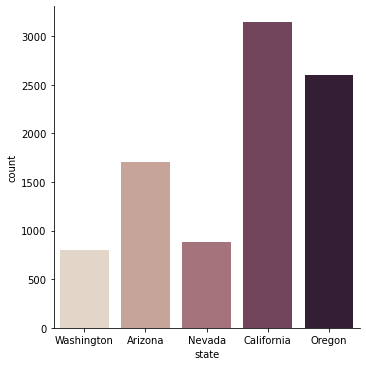

In [51]:
sns.catplot(x="state", kind="count", palette="ch:.25", data=categoricals)

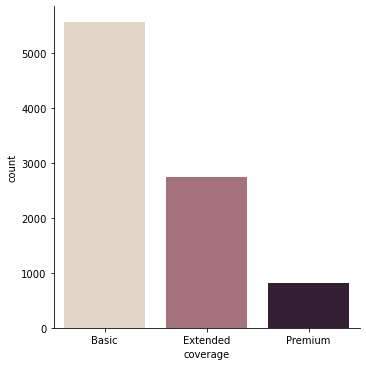

In [52]:
sns.catplot(x="coverage", kind="count", palette="ch:.25", data=categoricals)

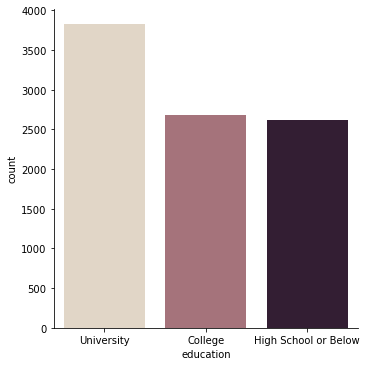

In [53]:
sns.catplot(x="education", kind="count", palette="ch:.25", data=categoricals)

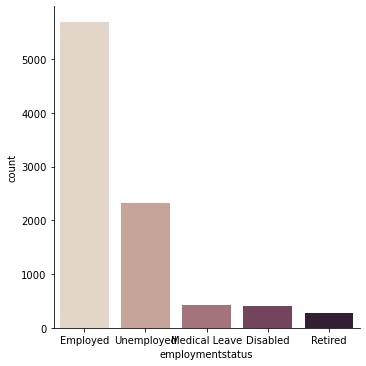

In [54]:
sns.catplot(x="employmentstatus", kind="count", palette="ch:.25", data=categoricals)

In [55]:
# most people are employed or unemployed, I can summarize medical leave+disabled+retired together as another category called non_working

data['employmentstatus'] = np.where(data['employmentstatus'].isin(['Medical Leave','Disabled','Retired']) , 'non_working', data['employmentstatus'])

<ipython-input-56-0904d6c845b5>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


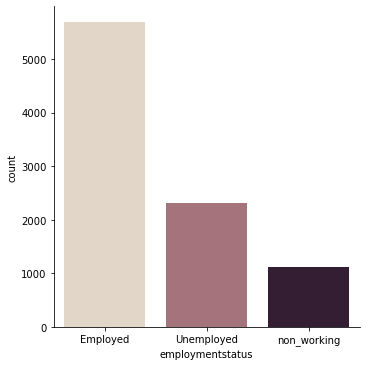

In [56]:
categoricals = data.select_dtypes(np.object)
sns.catplot(x="employmentstatus", kind="count", palette="ch:.25", data=categoricals)

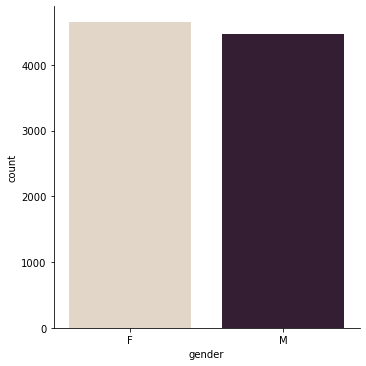

In [57]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=categoricals)

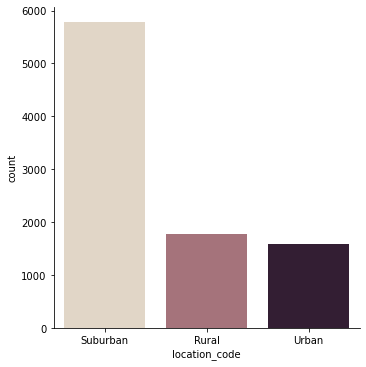

In [58]:
sns.catplot(x="location_code", kind="count", palette="ch:.25", data=categoricals)

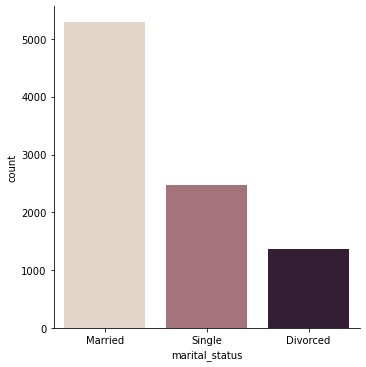

In [59]:
sns.catplot(x="marital_status", kind="count", palette="ch:.25", data=categoricals)

In [60]:
# single and divorced could be grouped together since it implies the same thing
data['marital_status'] = np.where(data['marital_status'].isin(['Single','Divorced']) , 'Unmarried', data['marital_status'])

<ipython-input-61-2a0c3c128d42>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


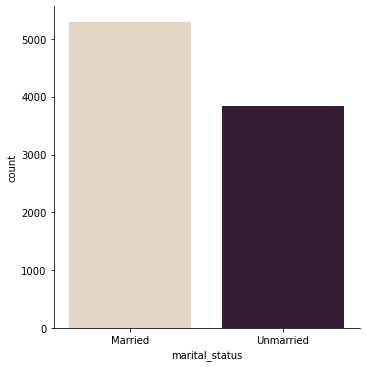

In [61]:
categoricals = data.select_dtypes(np.object)
sns.catplot(x="marital_status", kind="count", palette="ch:.25", data=categoricals)

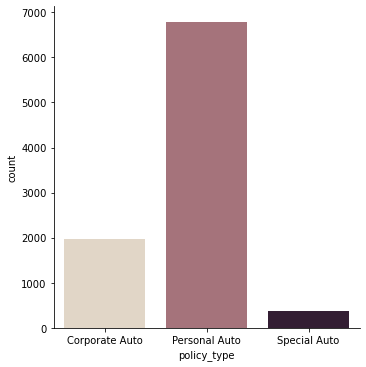

In [62]:
sns.catplot(x="policy_type", kind="count", palette="ch:.25", data=categoricals)

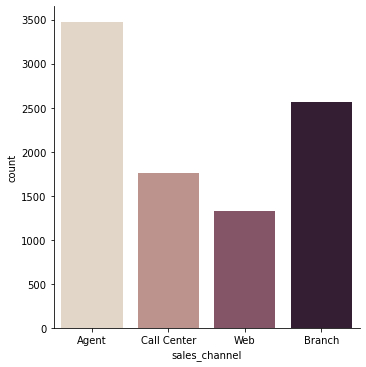

In [63]:
sns.catplot(x="sales_channel", kind="count", palette="ch:.25", data=categoricals)

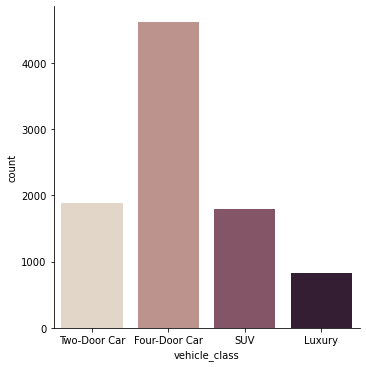

In [64]:
sns.catplot(x="vehicle_class", kind="count", palette="ch:.25", data=categoricals)

In [65]:
# i would imagine that almost all SUVs have 4 doors. i can not think of ne that has only two. so i would add it to four-door car
data['vehicle_class'] = np.where(data['vehicle_class'].isin(['SUV']) , 'Four-Door Car', data['vehicle_class'])

<ipython-input-66-a4af95bbec8b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


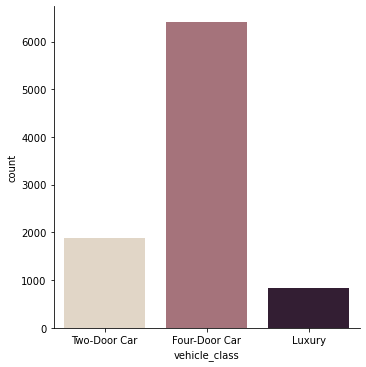

In [66]:
categoricals = data.select_dtypes(np.object)
sns.catplot(x="vehicle_class", kind="count", palette="ch:.25", data=categoricals)

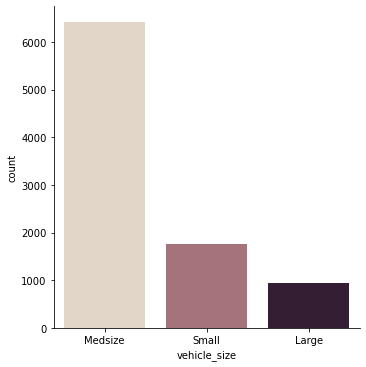

In [67]:
sns.catplot(x="vehicle_size", kind="count", palette="ch:.25", data=categoricals)

#### Plotting time variable

In [68]:
# the question asks to plot the time variable, but to me that doesnt make sense to plot dates of a calender without any relation to a variable
#so i plot time against total claim amount, use line plots

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


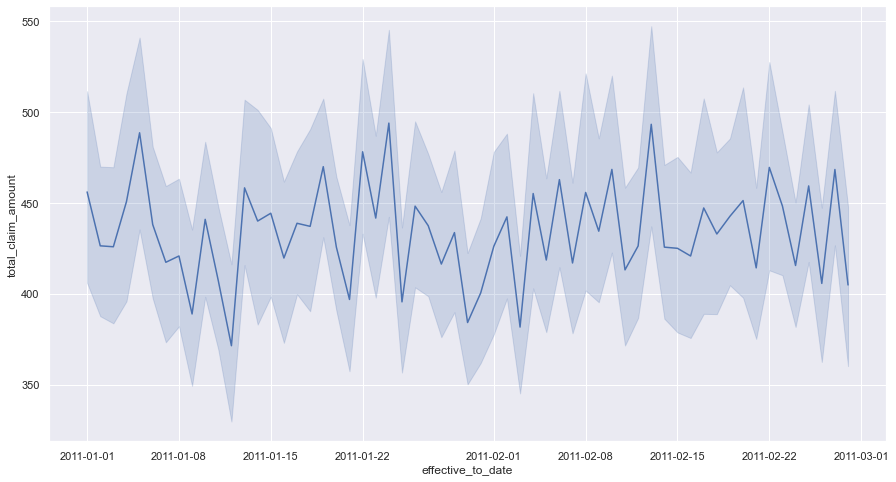

In [69]:
#plot over the different days
sns.set(rc = {'figure.figsize':(15,8)})
p= sns.lineplot(data['effective_to_date'] ,data['total_claim_amount'])

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

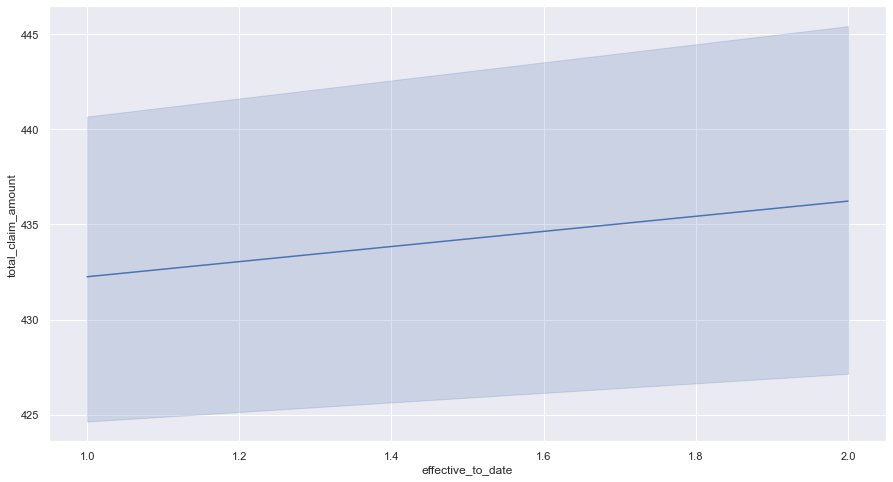

In [70]:
sns.lineplot(data['effective_to_date'].dt.month ,data['total_claim_amount'])
#plot for each

In [71]:
(data['effective_to_date'].dt.month).unique() # only january and february exist

array([2, 1])

In [72]:
# i want to check if the traget mean is somehwat different for the two monthes in the datem column, but its doesnt seem to be the case
# as well as for all others the mean is also pretty much similar in each month
data.groupby(data['effective_to_date'].dt.month).mean()

,customer_lifetime_value,response,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,total_claim_amount
effective_to_date,,,,,,,,,,,
1,8043.888001,0.154349,37652.617395,92.852389,15.292977,47.778889,0.389751,2.945488,2.316456,1.977746,432.246398
2,7959.906249,0.130312,37662.886922,93.643532,14.870397,48.394948,0.378187,2.990085,2.324127,1.961520,436.219119


In [73]:
(data['effective_to_date'].dt.year).unique() #all data is from one year, cant compare between years

array([2011])

In [74]:
# overall the time column doesnt seem to be of help in our dataset

## removing outliers

### usnign interquatile range looking at continious data

In [75]:
# as shown earlier in the boxplots the continious data has quite a number of outliers

continious_data_clean=continious_data.copy() #make a copy


Q1 = continious_data_clean.quantile(0.25)
Q3 = continious_data_clean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#as we can see customer_lifetime_value and income have a very large IQR

customer_lifetime_value           4967.915247
income                           62320.000000
monthly_premium_auto                41.000000
months_since_policy_inception       47.000000
total_claim_amount                 275.256594
dtype: float64


In [76]:
# remove the rows where the interquartile range for our continious data is above or under 1.5 the interquartile range
print(data.shape)
data_clean= data[~((continious_data_clean < (Q1 - 1.5 * IQR)) |(continious_data_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_clean.shape)
# almost 1300 rows are gone

(9134, 24)
(7847, 24)


In [78]:
#get only continious variables of cleaned dataframe
data_clean_cont=data_clean[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']]

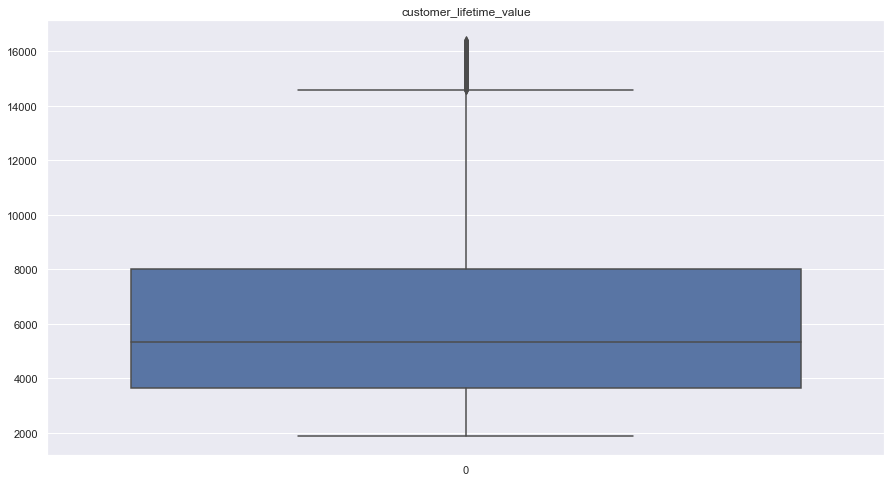

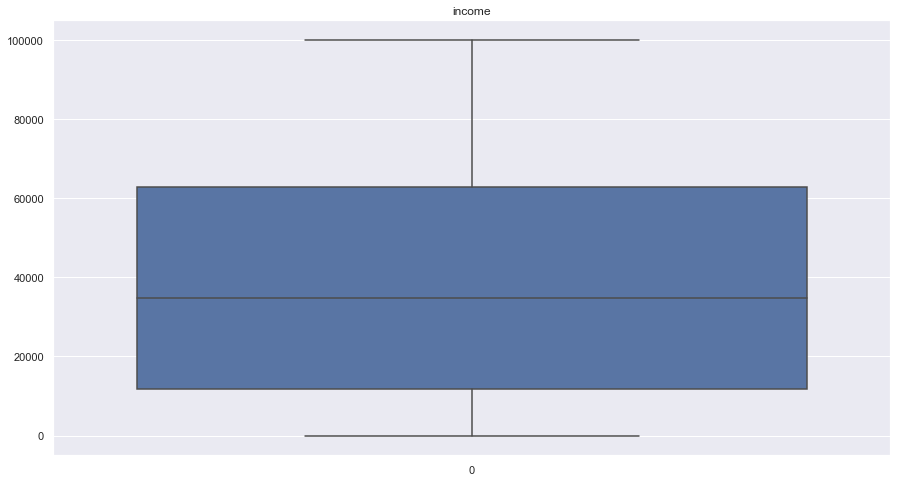

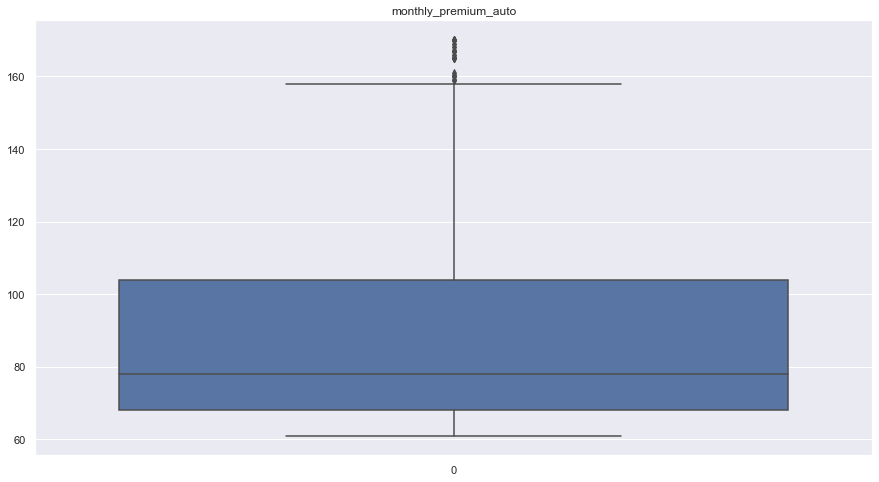

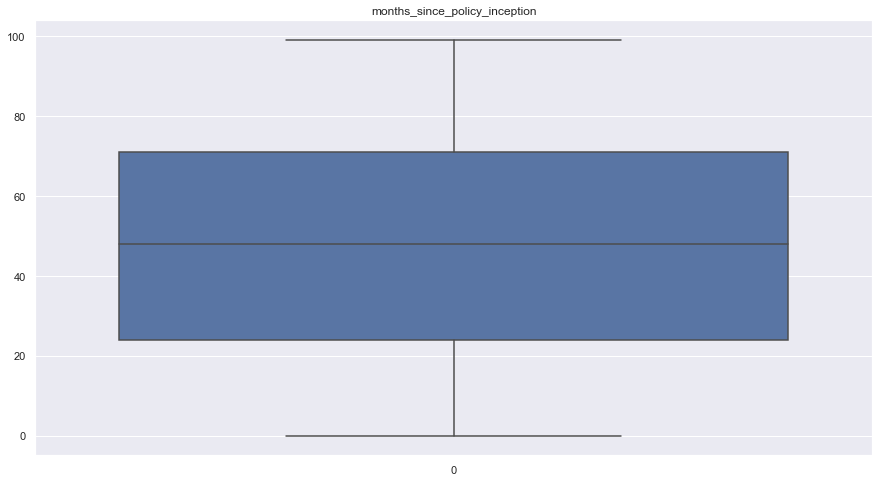

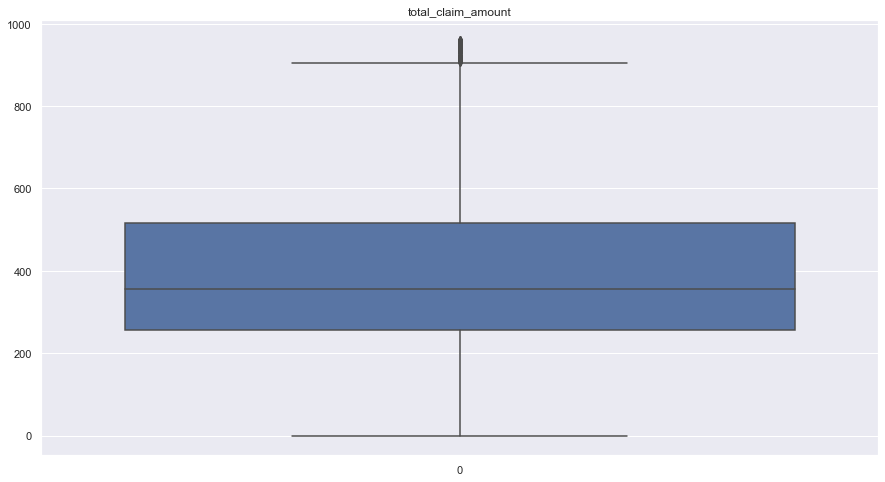

In [79]:
#use boxplotchart for others
for i in data_clean_cont.columns:
    plt.figure()
    sns.boxplot(data=data_clean_cont[i])
    plt.title(i)
    plt.show()

### discrete variables

In [80]:
#more data has been added to the discrete variables after going thorugh the categorical columns

data_clean_disc=data_clean[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies','response','policy','renew_offer_type']]
data_clean_disc.dtypes

months_since_last_claim      int64
number_of_open_complaints    int64
number_of_policies           int64
response                     int64
policy                       int64
renew_offer_type             int64
dtype: object

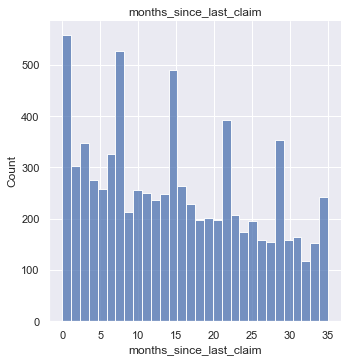

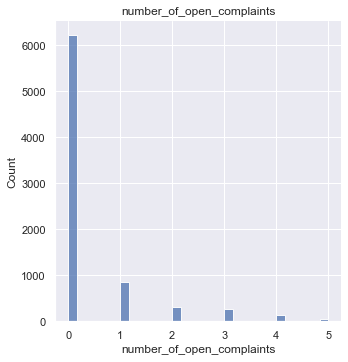

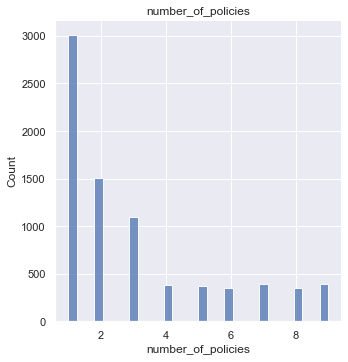

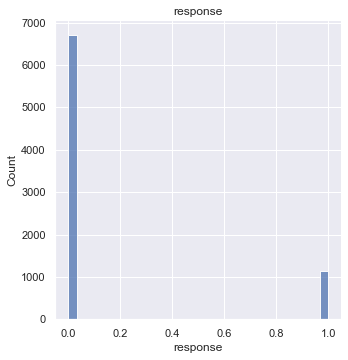

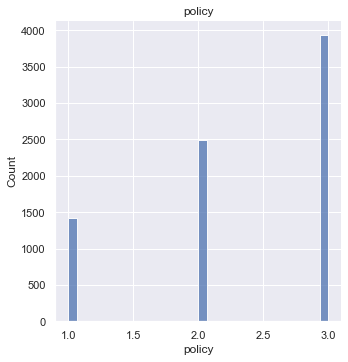

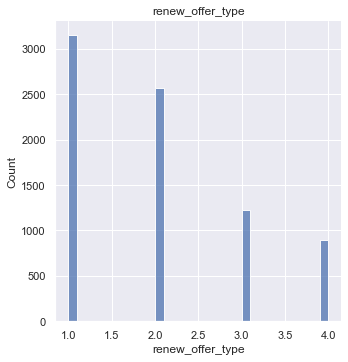

In [83]:

for i in data_clean_disc.columns:
    sns.displot(x=i, data= data_clean_disc, bins=30)
    plt.title(i)
    plt.show()
# one could potentially log transform some of the variables, but I will leave them as they are now

## x-y split and train-test split

In [90]:
X = data_clean.drop(['total_claim_amount'],axis=1)
y = data_clean['total_claim_amount']

data_clean_cont=data_clean_cont.drop(['total_claim_amount'],axis=1) #still have traget value in continious data dataframe

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [93]:
X_num_train=X_train[data_clean_cont.columns] #look what we select to scale
X_num_test=X_test[data_clean_cont.columns] 
X_num_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
8607,5389.499465,66429,136,93
7825,4854.362069,44279,61,7
3779,2446.911045,29152,67,72
5168,15114.402410,28513,100,22
4017,8331.648336,0,119,54
...,...,...,...,...
2737,3199.824902,78784,80,72
4722,6838.767672,15871,89,19
2125,7434.675149,28377,94,99
4458,2336.177331,0,67,28


## Minmax scale continious data

In [99]:
#fit on x_num_train data but also scale test data 
from sklearn.preprocessing import MinMaxScaler 

transformer = MinMaxScaler().fit(X_num_train) #fit train data

X_num_train_s = transformer.transform(X_num_train) #scale X_train data continious data
X_num_test_s = transformer.transform(X_num_test) #scale X_test data

X_num_train_norm=pd.DataFrame(X_num_train_s, columns=X_num_train.columns)
X_num_test_norm=pd.DataFrame(X_num_test_s, columns=X_num_test.columns)
X_num_test_norm

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception
0,0.240957,0.664549,0.688073,0.939394
1,0.204026,0.442963,0.000000,0.070707
2,0.037881,0.291634,0.055046,0.727273
3,0.912099,0.285241,0.357798,0.222222
4,0.444003,0.000000,0.532110,0.545455
...,...,...,...,...
1565,0.089842,0.788147,0.174312,0.727273
1566,0.340975,0.158772,0.256881,0.191919
1567,0.382100,0.283881,0.302752,1.000000
1568,0.030239,0.000000,0.055046,0.282828


## Encode the categorical variables: some directly as discrete numericals

#### we can encode someof the categorical columns with ordinal encoding, making them bascially discrete numericals

In [101]:
categoricals = data_clean.select_dtypes(np.object)
categoricals.head(3)

<ipython-input-101-86e867d688d3>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data_clean.select_dtypes(np.object)


,customer,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,Basic,University,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,Premium,University,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car,Medsize
3,WW63253,California,Basic,University,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,Four-Door Car,Medsize


In [113]:
#encode some columns manually (ordinal)
#since we already split the data I need to do it at xtrain and x-test, could have been easier if we still work on the original data

#coverage has 3 unique values
X_train["coverage"] = X_train["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test["coverage"] = X_test["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
#employment has 3 unique values
X_train["employmentstatus"] = X_train["employmentstatus"].map({"non_working" : 0, "Unemployed" : 1, "Employed" : 2})
X_test["employmentstatus"] = X_test["employmentstatus"].map({"non_working" : 0, "Unemployed" : 1, "Employed" : 2})
#location code has 3 unique values
X_train["location_code"] = X_train["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
X_test["location_code"] = X_test["location_code"].map({"Suburban" : 0, "Rural" : 1, "Urban" : 2})
#vehicle size has 3 unique values
X_train["vehicle_size"] = X_train["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
X_test["vehicle_size"] = X_test["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})


In [114]:
X_train.dtypes #these categories became numericals

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                  int64
coverage                                  int64
education                                object
effective_to_date                datetime64[ns]
employmentstatus                          int64
gender                                   object
income                                    int64
location_code                             int64
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                    int64
renew_offer_type                          int64
sales_channel                           

In [116]:
#append these new discrete numercials to our discrete data
X_train_disc=X_train[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies','response','policy','renew_offer_type','coverage','employmentstatus','location_code','vehicle_size']]
X_test_disc=X_test[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies','response','policy','renew_offer_type','coverage','employmentstatus','location_code','vehicle_size']]
X_train_disc

,months_since_last_claim,number_of_open_complaints,number_of_policies,response,policy,renew_offer_type,coverage,employmentstatus,location_code,vehicle_size
9005,16,0,1,0,3,4,2,2,0,1
6733,0,0,2,0,1,2,1,2,0,1
1187,25,1,2,0,3,2,1,2,0,1
6816,24,0,1,0,2,2,0,2,0,0
3395,19,0,9,0,2,1,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
90,21,1,2,0,3,2,2,0,0,0
4541,11,0,5,0,2,2,0,1,0,1
6941,31,0,9,0,3,1,1,1,0,1
8069,10,0,2,0,2,3,0,0,0,0


## One-hot encode the categoricals

In [118]:
#get objects from train and test data and have alook whats inside
categoricals_train= X_train.select_dtypes(np.object)
categoricals_test= X_test.select_dtypes(np.object)

#drop customer since no information we need
categoricals_train=categoricals_train.drop(['customer'], axis=1)
categoricals_test=categoricals_test.drop(['customer'], axis=1)

categoricals_train.head(3)

<ipython-input-118-c41f18853375>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_train= X_train.select_dtypes(np.object)
<ipython-input-118-c41f18853375>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals_test= X_test.select_dtypes(np.object)


,state,education,gender,marital_status,policy_type,sales_channel,vehicle_class
9005,California,High School or Below,M,Married,Personal Auto,Branch,Four-Door Car
6733,California,College,M,Married,Personal Auto,Branch,Four-Door Car
1187,Oregon,College,M,Married,Corporate Auto,Call Center,Luxury


In [125]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(categoricals_train) #fit encoder on X_train


categoricals_train_encoded= encoder.transform(categoricals_train).toarray() #encode train
categoricals_test_encoded= encoder.transform(categoricals_test).toarray() #encode test

encoder.categories_

#handle column names and drop always first column
cols = [colname for row in encoder.categories_ for colname in row]
cols_to_drop = [row[0] for row in encoder.categories_]

#create dataframe train
ONEHOT_train = pd.DataFrame(categoricals_train_encoded, columns=cols)
ONEHOT_train = ONEHOT_train.drop(cols_to_drop,axis=1)

#create dataframe test
ONEHOT_test = pd.DataFrame(categoricals_test_encoded, columns=cols)
ONEHOT_test = ONEHOT_test.drop(cols_to_drop,axis=1)



ONEHOT_train

,California,Nevada,Oregon,Washington,High School or Below,University,M,Unmarried,Personal Auto,Special Auto,Branch,Call Center,Web,Luxury,Two-Door Car
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6272,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6273,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6274,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6275,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### incorporate the time variable

In [212]:
#both weekday and month can be added as potentially useful parameters for prediction as hinted in the lab instruction
month_train=X_train['effective_to_date'].dt.month
month_test=X_test['effective_to_date'].dt.month

weekday_train=X_train['effective_to_date'].dt.dayofweek
weekday_test=X_test['effective_to_date'].dt.dayofweek
weekday_train

9005    4
6733    3
1187    5
6816    2
3395    3
       ..
90      3
4541    3
6941    2
8069    5
6580    6
Name: effective_to_date, Length: 6277, dtype: int64

### concatenate all dataframes together

In [213]:
# X_test_disc still has indices not starting from zero unlike the transformed data, therefore drop this indices
X_test_model=pd.concat([X_num_test_norm,X_test_disc.reset_index(drop=True),ONEHOT_test,month_test.reset_index(drop=True),weekday_test.reset_index(drop=True)], axis=1)
X_train_model=pd.concat([X_num_train_norm,X_train_disc.reset_index(drop=True),ONEHOT_train,month_train.reset_index(drop=True),weekday_train.reset_index(drop=True)], axis=1)
X_test_model.head(5)

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,response,policy,renew_offer_type,coverage,employmentstatus,location_code,vehicle_size,California,Nevada,Oregon,Washington,High School or Below,University,M,Unmarried,Personal Auto,Special Auto,Branch,Call Center,Web,Luxury,Two-Door Car,effective_to_date,effective_to_date
0,0.240957,0.664549,0.688073,0.939394,35,0,1,1,3,2,1,2,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,4
1,0.204026,0.442963,0.000000,0.070707,32,0,3,0,1,2,0,2,0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,3
2,0.037881,0.291634,0.055046,0.727273,24,0,1,0,3,4,0,0,2,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,3
3,0.912099,0.285241,0.357798,0.222222,4,1,2,1,1,2,0,0,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2
4,0.444003,0.000000,0.532110,0.545455,3,0,3,0,3,2,0,1,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1


## Simple linear regression

In [214]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train_model,y_train) #fit model

LinearRegression()

In [215]:
#evaluate model on test set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math


predictions= lm.predict(X_test_model)
print('R2=',r2_score(y_test, predictions))

mse=np.sqrt(mean_squared_error(y_test,predictions))
print('MSE=',mse)

rmse = math.sqrt(mse)
print('RMSE=',rmse)

mae = mean_absolute_error(y_test, predictions)
print('MAE=', mae)

R2= 0.47614422751032903
MSE= 148.09318813028372
RMSE= 12.169354466457278
MAE= 115.05673539006224


## defining a function that can test multiple models

In [216]:
def model_tests(X_train_model,X_test_model,y_train,y_test,models):
    
    from sklearn import linear_model
    from sklearn.metrics import r2_score
    from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
    from sklearn.neural_network import MLPRegressor

    
    
    if 'LR' in models:
        lm = linear_model.LinearRegression()
        lm.fit(X_train_model,y_train)
        predictions= lm.predict(X_test_model)
        r2=r2_score(y_test, predictions)
        
        print('Linear Regression score:',r2)
    
    
    if 'KNN' in models:
        KNN = KNeighborsRegressor(algorithm='auto',weights='distance')
        KNN.fit(X_train_model, y_train)
        score = KNN.score(X_test_model, y_test)
        
        print('KNeighbors Regression score:',score)
        
    if 'MLP' in models:
        MLP=MLPRegressor()
        MLP.fit(X_train_model, y_train)
        prediction2=MLP.predict(X_test_model)
        r2_2=r2_score(y_test, prediction2)
        
        print('MLP Regression score:',r2_2)
        
    


In [217]:
models=['LR','KNN','MLP'] #define which models to analyze, use abbreviations

model_tests(X_train_model,X_test_model,y_train,y_test,models) #give test and train set + model names

Linear Regression score: 0.47614422751032903
KNeighbors Regression score: 0.3190497850304922
MLP Regression score: 0.5676414809634229


/Users/test/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### A simple linear regression can already predict the total claim amount to some extent, whereas KNeigbors seems to be worse even when an algorithm tries to choose a good amount of n-neighbors, the best model so far is the MLP Regression Model